In [2]:
import matplotlib.colors as mcolors
import matplotlib.animation as ma
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from itertools import product
import pandas as pd
import numpy as np
import numba as nb
import imageio
import os
import shutil

randomSeed = 100

# %matplotlib widget
%matplotlib inline
%config InlineBackend.figure_format = "retina"

new_cmap = mcolors.LinearSegmentedColormap.from_list(
    "new", plt.cm.jet(np.linspace(0, 1, 256)) * 0.85, N=256
)

@nb.njit
def colors_idx(phaseTheta):
    return np.floor(256 - phaseTheta / (2 * np.pi) * 256).astype(np.int32)

import seaborn as sns

sns.set_theme(
    style="ticks", 
    font_scale=1.1, rc={
    'figure.figsize': (6, 5),
    'axes.facecolor': 'white',
    'figure.facecolor': 'white',
    'grid.color': '#dddddd',
    'grid.linewidth': 0.5,
    "lines.linewidth": 1.5,
    'text.color': '#000000',
    'figure.titleweight': "bold",
    'xtick.color': '#000000',
    'ytick.color': '#000000'
})

plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['animation.ffmpeg_path'] = "/opt/conda/bin/ffmpeg"

from main import *
from multiprocessing import Pool
import pandas as pd

def get_ts_centers_no_mod(model: TwoOsillators):
    sa = StateAnalysis(model, classDistance=0.3, lookIndex=0)
    ts_centers = []
    for i in range(1, sa.totalPhaseTheta.shape[0]):
        positionx = sa.totalPositionX[i, :, 0]
        positiony = sa.totalPositionX[i, :, 1]
        pointTheta = sa.totalPointTheta[i, :]
        center = np.array([
            positionx - model.speedV * model.dt / pointTheta * np.sin(sa.totalPhaseTheta[i, :]),
            positiony + model.speedV * model.dt / pointTheta * np.cos(sa.totalPhaseTheta[i, :])
        ]).T
        ts_centers.append(center)
    ts_centers.insert(0, ts_centers[0])
    return np.array(ts_centers)

colors = ["#403990", "#80A6E2", "#FBDD85", "#F46F43", "#CF3D3E"]
cmap = mcolors.LinearSegmentedColormap.from_list("my_colormap", colors)
cmap_r = mcolors.LinearSegmentedColormap.from_list("my_colormap", colors[::-1])

import sympy as sp

In [11]:
model = TwoOsillators(
    strengthLambda=2, r0=1, typeA="distanceWgt", omega1=3, omega2=2, dt=0.01, couplesNum=1, 
    savePath="./data", overWrite=True, tqdm=True
)
model.run(40000)

  0%|          | 0/40000 [00:00<?, ?it/s]

(-5.0, 5.0)

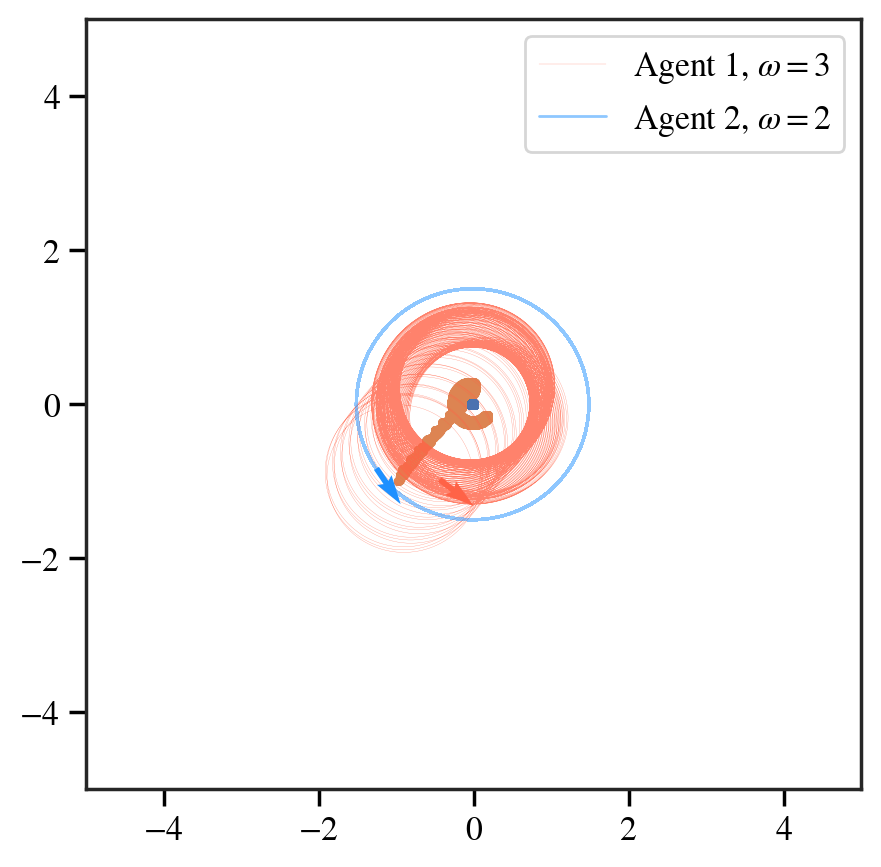

In [10]:
# model = models[1]
targetPath = f"./data/{model}.h5"
totalPositionX = pd.read_hdf(targetPath, key="positionX")
totalPhaseTheta = pd.read_hdf(targetPath, key="phaseTheta")
totalPointTheta = pd.read_hdf(targetPath, key="pointTheta")
TNum = totalPositionX.shape[0] // model.agentsNum
totalPositionX = totalPositionX.values.reshape(TNum, model.agentsNum, 2).transpose(0, 1, 2)
totalPhaseTheta = totalPhaseTheta.values.reshape(TNum, model.agentsNum)
totalPointTheta = totalPointTheta.values.reshape(TNum, model.agentsNum)
totalPointTheta[0] = np.nan
fig, ax = plt.subplots(figsize=(5, 5))
trajectoryLength = 0
plt.plot(totalPositionX[-trajectoryLength:, 0, 0], totalPositionX[-trajectoryLength:, 0, 1], color="tomato", alpha=0.8, lw=0.1)
plt.plot(totalPositionX[-trajectoryLength:, 1, 0], totalPositionX[-trajectoryLength:, 1, 1], color='dodgerblue', alpha=0.5, lw=1)
plt.quiver(
    totalPositionX[-1, 0, 0], totalPositionX[-1, 0, 1],
    np.cos(totalPhaseTheta[-1, 0]), np.sin(totalPhaseTheta[-1, 0]), color="tomato", zorder=10
)
plt.quiver(
    totalPositionX[-1, 1, 0], totalPositionX[-1, 1, 1],
    np.cos(totalPhaseTheta[-1, 1]), np.sin(totalPhaseTheta[-1, 1]), color="dodgerblue", zorder=10
)
plt.scatter(
    totalPositionX[:, 1, 0] - 3 * model.dt / totalPointTheta[:, 1] * np.sin(totalPhaseTheta[:, 1]),
    totalPositionX[:, 1, 1] + 3 * model.dt / totalPointTheta[:, 1] * np.cos(totalPhaseTheta[:, 1]), s=5, zorder=10
)
plt.scatter(
    totalPositionX[:, 0, 0] - 3 * model.dt / totalPointTheta[:, 0] * np.sin(totalPhaseTheta[:, 0]),
    totalPositionX[:, 0, 1] + 3 * model.dt / totalPointTheta[:, 0] * np.cos(totalPhaseTheta[:, 0]), s=5
)
plt.legend([fr"Agent 1, $\omega={model.omegaTheta[0]}$", fr"Agent 2, $\omega={model.omegaTheta[1]}$"])

bound = 5
plt.xlim(-bound, bound)
plt.ylim(-bound, bound)

(-5.0, 5.0)

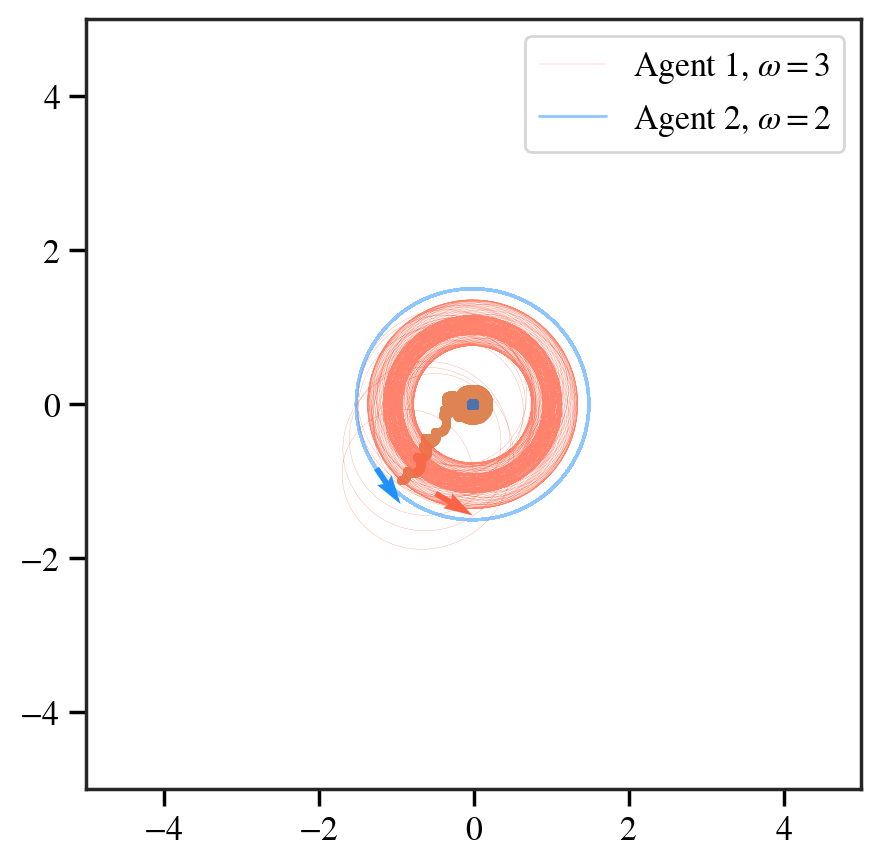

In [12]:
# model = models[1]
targetPath = f"./data/{model}.h5"
totalPositionX = pd.read_hdf(targetPath, key="positionX")
totalPhaseTheta = pd.read_hdf(targetPath, key="phaseTheta")
totalPointTheta = pd.read_hdf(targetPath, key="pointTheta")
TNum = totalPositionX.shape[0] // model.agentsNum
totalPositionX = totalPositionX.values.reshape(TNum, model.agentsNum, 2).transpose(0, 1, 2)
totalPhaseTheta = totalPhaseTheta.values.reshape(TNum, model.agentsNum)
totalPointTheta = totalPointTheta.values.reshape(TNum, model.agentsNum)
totalPointTheta[0] = np.nan
fig, ax = plt.subplots(figsize=(5, 5))
trajectoryLength = 0
plt.plot(totalPositionX[-trajectoryLength:, 0, 0], totalPositionX[-trajectoryLength:, 0, 1], color="tomato", alpha=0.8, lw=0.1)
plt.plot(totalPositionX[-trajectoryLength:, 1, 0], totalPositionX[-trajectoryLength:, 1, 1], color='dodgerblue', alpha=0.5, lw=1)
plt.quiver(
    totalPositionX[-1, 0, 0], totalPositionX[-1, 0, 1],
    np.cos(totalPhaseTheta[-1, 0]), np.sin(totalPhaseTheta[-1, 0]), color="tomato", zorder=10
)
plt.quiver(
    totalPositionX[-1, 1, 0], totalPositionX[-1, 1, 1],
    np.cos(totalPhaseTheta[-1, 1]), np.sin(totalPhaseTheta[-1, 1]), color="dodgerblue", zorder=10
)
plt.scatter(
    totalPositionX[:, 1, 0] - 3 * model.dt / totalPointTheta[:, 1] * np.sin(totalPhaseTheta[:, 1]),
    totalPositionX[:, 1, 1] + 3 * model.dt / totalPointTheta[:, 1] * np.cos(totalPhaseTheta[:, 1]), s=5, zorder=10
)
plt.scatter(
    totalPositionX[:, 0, 0] - 3 * model.dt / totalPointTheta[:, 0] * np.sin(totalPhaseTheta[:, 0]),
    totalPositionX[:, 0, 1] + 3 * model.dt / totalPointTheta[:, 0] * np.cos(totalPhaseTheta[:, 0]), s=5
)
plt.legend([fr"Agent 1, $\omega={model.omegaTheta[0]}$", fr"Agent 2, $\omega={model.omegaTheta[1]}$"])

bound = 5
plt.xlim(-bound, bound)
plt.ylim(-bound, bound)

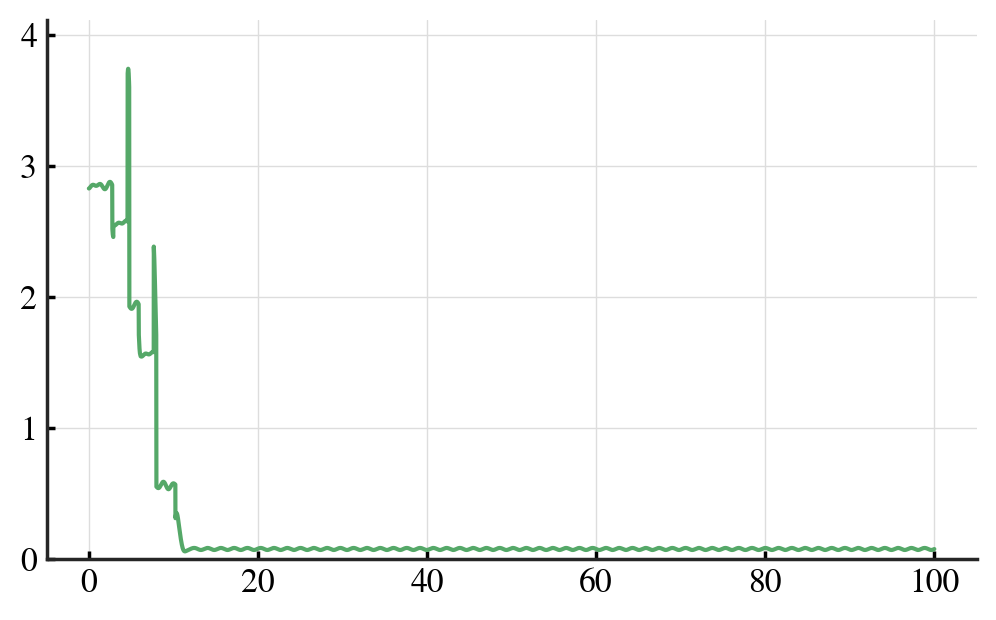

In [4]:
plt.subplots(1, 1, figsize=(6, 3.5))
colorIdx = 2

targetPath = f"./data/{model}.h5"
totalPositionX = pd.read_hdf(targetPath, key="positionX")
totalPhaseTheta = pd.read_hdf(targetPath, key="phaseTheta")
totalPointTheta = pd.read_hdf(targetPath, key="pointTheta")
TNum = totalPositionX.shape[0] // model.agentsNum
totalPositionX = totalPositionX.values.reshape(TNum, model.agentsNum, 2)
totalPhaseTheta = totalPhaseTheta.values.reshape(TNum, model.agentsNum)
totalPointTheta = totalPointTheta.values.reshape(TNum, model.agentsNum)
tsCentersNoMod = get_ts_centers_no_mod(model)
sub = tsCentersNoMod[:, 0] - tsCentersNoMod[:, 1]
distance = np.sqrt(np.sum(sub ** 2, axis=1))
omega1, omega2 = model.omegaTheta
x = np.arange(len(distance)) * model.dt
plt.plot(x, distance, color=f"C{colorIdx}",
            label=fr"$d_0={model.r0}, \omega_1={omega1}, \omega_2={omega2}$")
# plt.axline((0, model.distanceD0 + np.sum(3 / np.abs(model.omegaTheta))), slope=0, 
#             color=f"C{colorIdx}", linestyle="--", alpha=0.8, lw=1)
colorIdx += 1
plt.ylim(0, distance.max() * 1.1)

plt.tick_params(direction='in', length=3)
plt.grid(True)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [119]:
from sympy import symbols, Eq, Function, sin, cos, diff, Matrix, sqrt, latex, simplify, sign, pi, tan, exp

# 定义符号变量
t = symbols('t')
f, v, r_1, omega_1, lamda, r_2, Delta_phi, omega_2, Delta_omega, Delta_theta = symbols(
    'f v r_1 omega_1 lamda r_2 Delta_phi omega_2 Delta_omega Delta_theta'
)
fr1, fAlpha1, f, K, fDeltaTheta, omega1, r0 = symbols(
    r'f_{r1} f_{\alpha_1} f K f_{\Delta\theta} \omega_1 r_0'
)
omega2 = symbols(r'\omega_2', real=True, nonzero=True)

r_1 = Function('r_1')(t)
alpha1 = Function('alpha_1')(t)
Delta_theta = Function('Delta_theta')(t)
f = Function('f')(r_1, alpha1, Delta_theta)
alpha_2 = symbols("alpha_2")

# 定义未知函数
r_1_dot = r_1.diff(t)
alpha1_dot = alpha1.diff(t)
Delta_theta_dot = Delta_theta.diff(t)

# 定义方程组
eq1 = Eq(r_1_dot, v*cos(alpha1))
eq2 = Eq(alpha1_dot, omega1 + K*f*sin(Delta_theta) - v / r_1 * sin(alpha1))
eq3 = Eq(Delta_theta_dot, Delta_omega - K*f*sin(Delta_theta))

# 打印方程组
print("动力学方程组:")
display(eq1)
display(eq2)
display(eq3)

动力学方程组:


Eq(Derivative(r_1(t), t), v*cos(alpha_1(t)))

Eq(Derivative(alpha_1(t), t), K*f(r_1(t), alpha_1(t), Delta_theta(t))*sin(Delta_theta(t)) + \omega_1 - v*sin(alpha_1(t))/r_1(t))

Eq(Derivative(Delta_theta(t), t), Delta_omega - K*f(r_1(t), alpha_1(t), Delta_theta(t))*sin(Delta_theta(t)))

In [80]:
M = Matrix([
    [diff(eq.rhs, var) for var in [r_1, alpha1, Delta_theta]]
    for eq in [eq1, eq2, eq3]
])
M

Matrix([
[                                                                                                            0,                                                                                             -v*sin(alpha_1(t)),                                                                                                                                                      0],
[K*sin(Delta_theta(t))*Derivative(f(r_1(t), alpha_1(t), Delta_theta(t)), r_1(t)) + v*sin(alpha_1(t))/r_1(t)**2, K*sin(Delta_theta(t))*Derivative(f(r_1(t), alpha_1(t), Delta_theta(t)), alpha_1(t)) - v*cos(alpha_1(t))/r_1(t),  K*f(r_1(t), alpha_1(t), Delta_theta(t))*cos(Delta_theta(t)) + K*sin(Delta_theta(t))*Derivative(f(r_1(t), alpha_1(t), Delta_theta(t)), Delta_theta(t))],
[                             -K*sin(Delta_theta(t))*Derivative(f(r_1(t), alpha_1(t), Delta_theta(t)), r_1(t)),                           -K*sin(Delta_theta(t))*Derivative(f(r_1(t), alpha_1(t), Delta_theta(t)), alpha_1(t)), -K*f(r_1(t), 

In [3]:
CDelta, r_0 = symbols(r'C_{\Delta} r_0')
f, g = symbols('f g')
# f = (1 + v * sqrt(2 - 2*cos(CDeltaPhi)) / abs(omega_2) / r_0) ** (-1 / r_0)
# g = -abs(omega_2) * (1 + v * sqrt(2 - 2*cos(CDeltaPhi)) / abs(omega_2) / r_0) ** (-1 / r_0 - 1) / v / sqrt(2 - 2*cos(CDeltaPhi)) / r_0**2

# -omega_2**2 / v * sign(omega_2) - lamda*v/omega_2*g*sin(CDeltaTheta)
# - lamda*v**2/omega_2*g*sin(CDeltaTheta)*sin(CDeltaPhi)
# -lamda * f * cos(CDeltaTheta)

In [103]:
deltaOmega = symbols(r'\Delta\omega')
Mnew = Matrix([
    [0, -v / K, 0],
    [fr1 * sin(Delta_theta) + omega2 ** 2 / v, fAlpha1 * sin(Delta_theta), fDeltaTheta * sin(Delta_theta) + deltaOmega / K / tan(Delta_theta)],
    [-fr1 * sin(Delta_theta), -fAlpha1 * sin(Delta_theta), -fDeltaTheta * sin(Delta_theta) - deltaOmega / K / tan(Delta_theta)]
])
l = symbols(r'\lambda')
charploy = (
    Matrix([
        [l, 0, 0], [0, l, 0], [0, 0, l]
    ]) - Mnew
).det().simplify()
# display(charploy)
# Mnew

In [120]:
r1, alpha1, alpha2 = symbols("r1 alpha1 alpha2")
r = sqrt(v**2 / omega2**2 + r1**2 - 2*r1*v/omega2*cos(alpha2 - alpha1 - Delta_theta))
f = exp(-r / r0)
display(f.diff(r1))
display(f.diff(alpha1))
display(f.diff(Delta_theta))

-(r1 - v*cos(alpha1 - alpha2 + Delta_theta(t))/\omega_2)*exp(-sqrt(r1**2 - 2*r1*v*cos(alpha1 - alpha2 + Delta_theta(t))/\omega_2 + v**2/\omega_2**2)/r_0)/(r_0*sqrt(r1**2 - 2*r1*v*cos(alpha1 - alpha2 + Delta_theta(t))/\omega_2 + v**2/\omega_2**2))

-r1*v*exp(-sqrt(r1**2 - 2*r1*v*cos(alpha1 - alpha2 + Delta_theta(t))/\omega_2 + v**2/\omega_2**2)/r_0)*sin(alpha1 - alpha2 + Delta_theta(t))/(\omega_2*r_0*sqrt(r1**2 - 2*r1*v*cos(alpha1 - alpha2 + Delta_theta(t))/\omega_2 + v**2/\omega_2**2))

-r1*v*exp(-sqrt(r1**2 - 2*r1*v*cos(alpha1 - alpha2 + Delta_theta(t))/\omega_2 + v**2/\omega_2**2)/r_0)*sin(alpha1 - alpha2 + Delta_theta(t))/(\omega_2*r_0*sqrt(r1**2 - 2*r1*v*cos(alpha1 - alpha2 + Delta_theta(t))/\omega_2 + v**2/\omega_2**2))

In [121]:
v = 3
omega2 = 3
absDeltaOmega = 0.1
DeltaPhi = 1e-5

lamda = 0.5
r0 = 1
f = (1 + v * np.sqrt(2 - 2 * np.cos(DeltaPhi)) / np.abs(omega2) / r_0) ** (-1 / r0)
g = - np.abs(omega2) * f**(1 + r0) / (v * r0**2 * np.sqrt(2 - 2 * np.cos(DeltaPhi)))
m12 = v * np.sign(omega2)
m21 = - omega2**2 / v * np.sign(omega2)
m31 = - lamda * v / np.abs(omega2) * g * np.sin(DeltaPhi)
m32 = lamda * v**2 / omega2**2 * g * np.sin(DeltaPhi)**2
m33 = - lamda * f * np.cos(DeltaPhi)
matrix = np.array([
    [0, m12, m12],
    [m21, 0, 0],
    [m31, m32, m33]
])
eigenvalues = np.linalg.eigvals(matrix)
print(eigenvalues)

[ 0.04773832+2.74856413j  0.04773832-2.74856413j -0.59547165+0.j        ]


In [122]:
lamda * f, lamda, f

(0.49999500004979264, 0.5, 0.9999900000995853)

In [13]:
def get_2_maps(lamdaRange: np.ndarray, r0Range: np.ndarray, 
               v: float, omega2: float, absDeltaOmega: float, DeltaPhi: float):

    classMap = np.zeros((len(lamdaRange), len(r0Range)))
    fixPointMap = np.zeros((len(lamdaRange), len(r0Range)))

    for lamdaIdx, lamda in enumerate(lamdaRange):
        for r0Idx, r0 in enumerate(r0Range):
            f = (1 + v * np.sqrt(2 - 2 * np.cos(DeltaPhi)) / np.abs(omega2) / r0) ** (-1 / r0)
            g = - np.abs(omega2) * f**(1 + r0) / (v * r0**2 * np.sqrt(2 - 2 * np.cos(DeltaPhi)))
            m12 = v * np.sign(omega2)
            m21 = - omega2**2 / v * np.sign(omega2)
            m31 = - lamda * v / np.abs(omega2) * g * np.sin(DeltaPhi)
            m32 = lamda * v**2 / omega2**2 * g * np.sin(DeltaPhi)**2
            m33 = - lamda * f * np.cos(DeltaPhi)
            matrix = np.array([
                [0, m12, m12],
                [m21, 0, 0],
                [m31, m32, m33]
            ])
            eigenvalues = np.linalg.eigvals(matrix)
            if lamda * f < absDeltaOmega:  # escape
                fixPointMap[lamdaIdx, r0Idx] = 0
            else:
                fixPointMap[lamdaIdx, r0Idx] = 1
            if np.all(np.real(eigenvalues) < 0):  # stable
                if np.any(np.imag(eigenvalues) != 0):  # stable focus
                    classMap[lamdaIdx, r0Idx] = 1
                else:  # stable node
                    classMap[lamdaIdx, r0Idx] = 2
            elif np.all(np.real(eigenvalues) > 0):  # unstable
                if np.any(np.imag(eigenvalues) != 0):  # unstable focus
                    classMap[lamdaIdx, r0Idx] = 3
                else:  # unstable node
                    classMap[lamdaIdx, r0Idx] = 4
            else:  # saddle
                if np.sum(np.sign(np.real(eigenvalues)) == 1) == 2:
                    classMap[lamdaIdx, r0Idx] = 2.5
                else:
                    classMap[lamdaIdx, r0Idx] = 5

    return classMap, fixPointMap

v = 3
omega2 = 2
absDeltaOmega = 0.10
lamdaRange = np.linspace(0, 2, 100)
r0Range = np.linspace(0.01, 5, 100)
DeltaPhi = np.pi / 12  # np.pi / 12
classMap, fixPointMap = get_2_maps(lamdaRange, r0Range, v, omega2, absDeltaOmega, DeltaPhi)
maxLambdas = []
for r0Idx, r0 in enumerate(r0Range):
    maxLambda = np.max(lamdaRange[fixPointMap[:, r0Idx] == 0])
    maxLambdas.append(maxLambda)

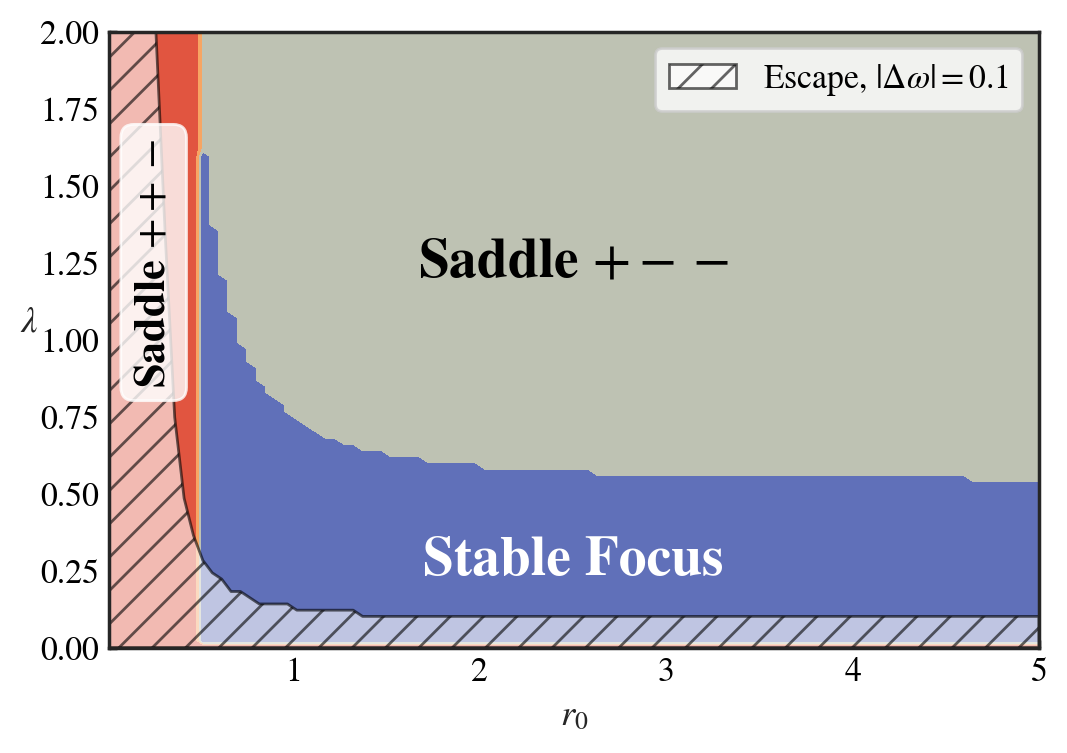

In [39]:
plt.figure(figsize=(6, 4))
plt.contourf(
    r0Range, lamdaRange, classMap, levels=len(np.unique(classMap)),
    cmap=cmap, alpha=1, 
)
plt.fill_between(r0Range, 0, maxLambdas, color="white", alpha=0.6, hatch="//", 
                 edgecolor="black", label=rf"Escape, $|\Delta\omega|={absDeltaOmega}$")
bbox_style = {
    'boxstyle': 'round',  # 文本框形状为圆角矩形
    'facecolor': 'white',  # 背景颜色为黄色
    'alpha': 0.8  # 透明度为0.5
}
plt.text(2.5, 0.28, "Stable Focus", color='white', fontsize=20, ha="center", va="center", fontweight="bold")
plt.text(2.5, 1.25, r"Saddle $+--$", color='black', fontsize=20, ha="center", va="center", fontweight="bold")
plt.text(0.25, 1.25, r"Saddle $++-$", color='black', fontsize=16, ha="center", va="center", fontweight="bold", 
         rotation=90, bbox=bbox_style)
# df = pd.DataFrame(classMap, index=lamdaRange, columns=r0Range)[::-1]
# df.index = np.round(df.index, 1)
# df.columns = np.round(df.columns, 2)
# sns.heatmap(df, xticklabels=10, yticklabels=10, cmap=cmap, cbar=False)
plt.xlabel(r"$r_0$")
plt.ylabel(r"$\lambda$", rotation=0)
plt.tick_params(direction='in', length=3)
plt.legend()
plt.show()

In [2]:
import matplotlib.pyplot as plt
from scipy import optimize
import numpy as np
import numba as nb

class TwoOsillatorsCartesian:
    def __init__(self, K: float, r0: float, omega2: float, omega1: float, 
                 v: float = 3, dt: float = 0.01) -> None:   
        self.K = K
        self.alpha2 = np.pi * np.sign(omega2) / 2
        self.r0 = r0
        self.omega2 = omega2
        self.omega1 = omega1
        self.v = v
        self.deltaOmega = omega2 - omega1
        self.r2 = self.v / np.abs(self.omega2)
        self.dt = dt

    def f(self, x1, y1, x2, y2):
        r = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)
        return np.exp(-r / self.r0)

    def point(self, x1, y1, theta1, x2, y2, theta2):
        fValue = self.f(x1, y1, x2, y2)
        return (
            self.v * np.cos(theta1),
            self.v * np.sin(theta1),
            self.omega1 + self.K * fValue * np.sin(theta2 - theta1),
            self.v * np.cos(theta2),
            self.v * np.sin(theta2),
            self.omega2
        )
    
    def get_init_state(self, initState: np.ndarray):
        r1, alpha1, DeltaTheta = initState
        theta2 = 0
        theta1 = theta2 - DeltaTheta
        phi1 = theta1 - alpha1
        phi2 = theta2 - self.alpha2
        x1 = [r1 * np.cos(phi1)]
        y1 = [r1 * np.sin(phi1)]
        theta1 = [theta1]
        x2 = [self.r2 * np.cos(phi2)]
        y2 = [self.r2 * np.sin(phi2)]
        theta2 = [theta2]
        return x1, y1, theta1, x2, y2, theta2

    def get_trajectories(self, initState: np.ndarray, iterations=100):
        x1, y1, theta1, x2, y2, theta2 = self.get_init_state(initState)
        for _ in range(iterations):
            x1T, y1T, theta1T, x2T, y2T, theta2T = x1[-1], y1[-1], theta1[-1], x2[-1], y2[-1], theta2[-1]
            x1K1, y1K1, theta1K1, x2K1, y2K1, theta2K1 = self.point(x1T, y1T, theta1T, x2T, y2T, theta2T)
            x1.append(x1T + self.dt * x1K1)
            y1.append(y1T + self.dt * y1K1)
            theta1.append(theta1T + self.dt * theta1K1)
            x2.append(x2T + self.dt * x2K1)
            y2.append(y2T + self.dt * y2K1)
            theta2.append(theta2T + self.dt * theta2K1)
        return np.array([x1, y1, theta1, x2, y2, theta2])

class TwoOsillatorsPolorization1:
    def __init__(self, K: float, r0: float, omega2: float, omega1: float, 
                 v: float = 3, dt: float = 0.01) -> None:   
        self.K = K
        self.alpha2 = np.pi * np.sign(omega2) / 2
        self.r0 = r0
        self.omega2 = omega2
        self.omega1 = omega1
        self.v = v
        self.deltaOmega = omega2 - omega1
        self.r2 = self.v / np.abs(self.omega2)
        self.dt = dt

    def get_init_state(self, initState: np.ndarray):
        r1, alpha1, DeltaTheta = initState
        theta2 = 0
        theta1 = theta2 - DeltaTheta
        phi1 = theta1 - alpha1
        phi2 = theta2 - self.alpha2
        r1 = [r1]
        r2 = [self.r2]
        ph1 = [phi1]
        ph2 = [phi2]
        theta1 = [theta1]
        theta2 = [theta2]
        return r1, ph1, theta1, r2, ph2, theta2

    def f(self, r1: float, r2: float, phi1: float, phi2: float):
        r = np.sqrt(r1**2 + r2**2 - 2 * r1 * r2 * np.cos(phi1 - phi2))
        return np.exp(-r / self.r0)

    def point(self, r1: float, phi1: float, theta1: float, r2: float, phi2: float, theta2: float):
        fValue = self.f(r1, r2, phi1, phi2)
        return (
            self.v * np.cos(theta1 - phi1),
            self.v / r1 * np.sin(theta1 - phi1),
            self.omega1 + self.K * fValue * np.sin(theta2 - theta1),
            self.v * np.cos(theta2 - phi2),
            self.v / r2 * np.sin(theta2 - phi2),
            self.omega2
        )

    def get_trajectories(self, initState: np.ndarray, iterations=100):
        r1, ph1, theta1, r2, ph2, theta2 = self.get_init_state(initState)
        for _ in range(iterations):
            r1T, ph1T, theta1T, r2T, ph2T, theta2T = r1[-1], ph1[-1], theta1[-1], r2[-1], ph2[-1], theta2[-1]
            r1K1, ph1K1, theta1K1, r2K1, ph2K1, theta2K1 = self.point(r1T, ph1T, theta1T, r2T, ph2T, theta2T)
            r1.append(r1T + self.dt * r1K1)
            ph1.append(ph1T + self.dt * ph1K1)
            theta1.append(theta1T + self.dt * theta1K1)
            r2.append(r2T + self.dt * r2K1)
            ph2.append(ph2T + self.dt * ph2K1)
            theta2.append(theta2T + self.dt * theta2K1)
        return np.array([r1, ph1, theta1, r2, ph2, theta2])

class TwoOsillatorsPolorization2:
    def __init__(self, K: float, r0: float, omega2: float, omega1: float, 
                 v: float = 3, dt: float = 0.01) -> None:   
        self.K = K
        self.alpha2 = np.pi * np.sign(omega2) / 2
        self.r0 = r0
        self.omega2 = omega2
        self.omega1 = omega1
        self.v = v
        self.deltaOmega = omega2 - omega1
        self.r2 = self.v / np.abs(self.omega2)
        self.dt = dt

    def f(self, r1: float, alpha1: float, DeltaTheta: float):
        deltaPhi = self.alpha2 - alpha1 - DeltaTheta
        r = np.sqrt(r1**2 + self.r2**2 - 2 * r1 * self.r2 * np.cos(deltaPhi))
        return np.exp(-r / self.r0)

    def point(self, r1: float, alpha1: float, DeltaTheta: float):
        fValue = self.f(r1, alpha1, DeltaTheta)
        return (
            self.v * np.cos(alpha1),
            self.omega1 + self.K * fValue * np.sin(DeltaTheta) - self.v / r1 * np.sin(alpha1),
            self.deltaOmega - self.K * fValue * np.sin(DeltaTheta)
        )
    
    def get_fix_point(self):
        # 用scipy的optimize求解
        def func(x):
            r1, alpha1, DeltaTheta = x
            return self.point(r1, alpha1, DeltaTheta)
        res = optimize.root(func, [self.r2, np.pi / 2, 0])
        return res.x
    
    def get_trajectories(self, initState: np.ndarray, iterations=100):
        r1, alpha1, DeltaTheta = [initState[0]], [initState[1]], [initState[2]]
        for _ in range(iterations):
            r1T, alpha1T, DeltaThetaT = r1[-1], alpha1[-1], DeltaTheta[-1]
            r1K1, deltaPhiK1, deltaThetaK1 = self.point(r1T, alpha1T, DeltaThetaT)
            r1.append(r1T + self.dt * r1K1)
            alpha1.append(alpha1T + self.dt * deltaPhiK1)
            DeltaTheta.append(DeltaThetaT + self.dt * deltaThetaK1)
        return np.array([r1, alpha1, DeltaTheta])

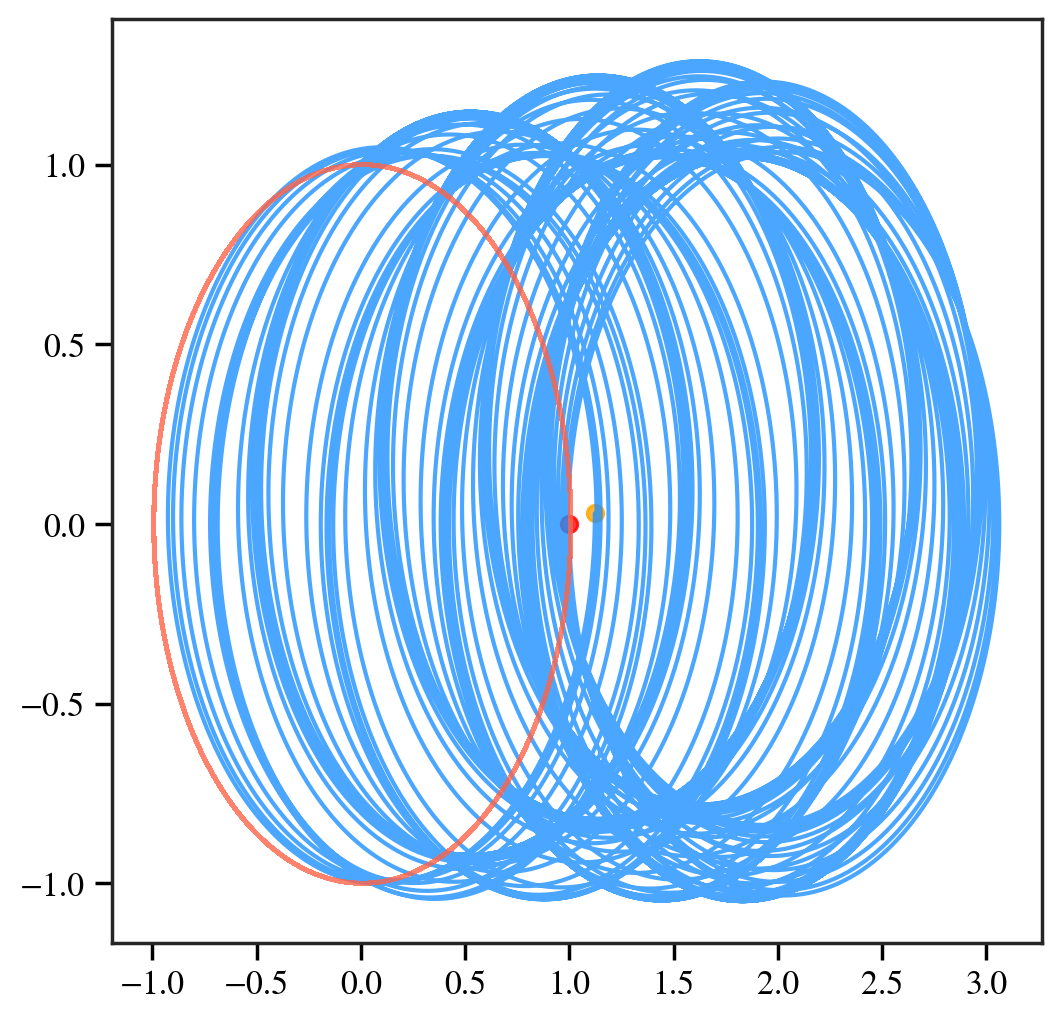

In [22]:
model = TwoOsillatorsCartesian(K=1, r0=0.2, omega2=3, omega1=2.9, dt=0.005)
initState = np.array([1, -np.pi / 2, np.pi / 2])
trajectories = model.get_trajectories(initState, 50000)
x1, y1, theta1, x2, y2, theta2 = trajectories
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.plot(x1, y1, color='dodgerblue', alpha=0.8)
tailCOunts = 1000
# ax.plot(x1[-tailCOunts:], y1[-tailCOunts:], color='dodgerblue', alpha=0.8)
ax.plot(x2, y2, color='tomato', alpha=0.8)
ax.scatter(x1[0], y1[0], color='red', alpha=0.8)
ax.scatter(x1[-1], y1[-1], color='orange', alpha=0.8)

(-2.1, 2.1)

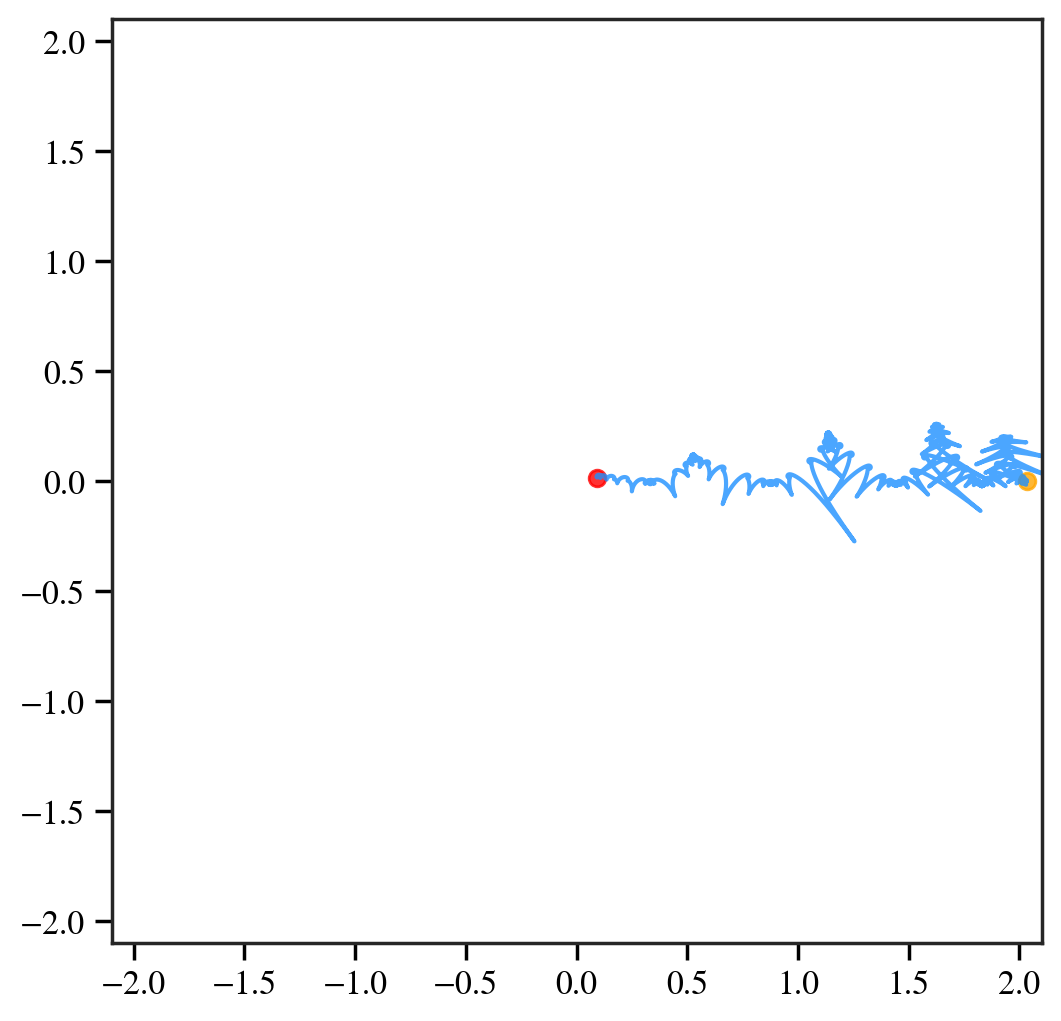

In [23]:
dotTheta1 = model.omega1 + model.K * model.f(x1, y1, x2, y2) * np.sin(theta2 - theta1)
centerX1 = x1 - model.v / dotTheta1 * np.sin(theta1)
centerY1 = y1 + model.v / dotTheta1 * np.cos(theta1)
plt.figure(figsize=(6, 6))
# plt.plot(x1, y1, color='tomato', alpha=0.8)
plt.plot(centerX1, centerY1, color='dodgerblue', alpha=0.8, linestyle='-')
plt.scatter(centerX1[0], centerY1[0], color='orange', alpha=0.8)
plt.scatter(centerX1[-1], centerY1[-1], color='red', alpha=0.8)
bound = 2.1
plt.xlim(-bound, bound)
plt.ylim(-bound, bound)

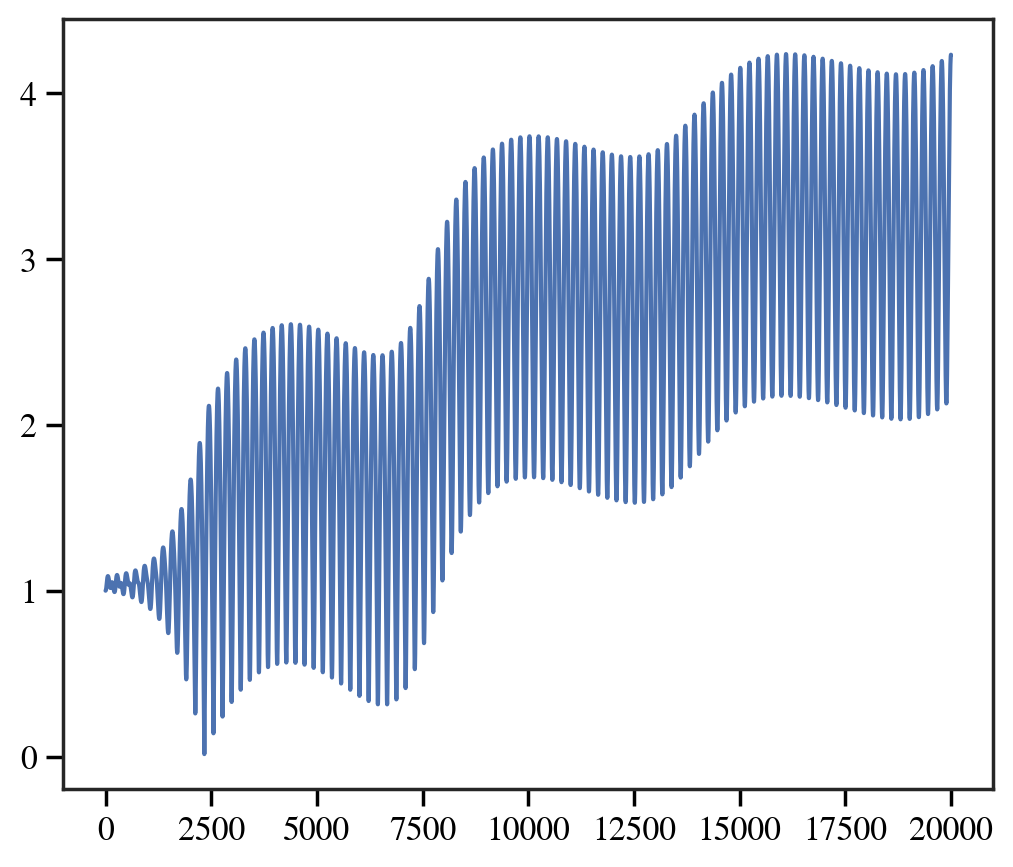

In [55]:
model = TwoOsillatorsPolorization2(K=1, r0=1, omega2=3, omega1=-2.9)
initState = np.array([1, -np.pi / 2, np.pi / 2])
trajectories = model.get_trajectories(initState, 20000)
r1, alpha1, DeltaTheta = trajectories

plt.plot(r1)

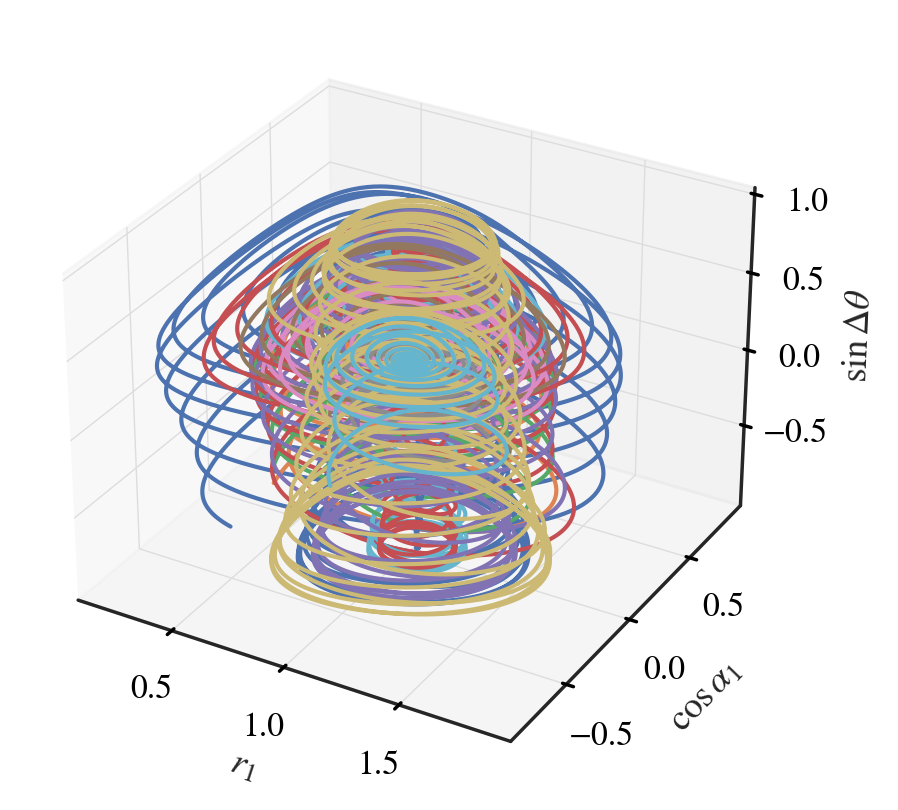

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
trajectoriesPool = []
initStatePool = []

for i in range(20):
    model = TwoOsillatorsPolorization2(K=1, r0=0.3, omega2=3, omega1=2.9, dt=0.005)
    initState = np.array([
        0.5 + 0.5 * np.random.random(), 
        np.random.uniform(np.pi / 4, np.pi / 4 * 3), 
        np.random.uniform(-np.pi / 4, np.pi / 4)
    ])
    trajectories = model.get_trajectories(initState, 20000)
    r1, alpha1, DeltaTheta = trajectories
    if r1.min() < 0:
        continue
    trajectoriesPool.append(trajectories)
    initStatePool.append(initState)
    ax.plot(r1, np.cos(alpha1), np.sin(DeltaTheta), color=f"C{i}")

# ax.plot(trajectories[0], trajectories[1], trajectories[2])
ax.set_xlabel(r"$r_1$")
ax.set_ylabel(r"$\cos\alpha_1$")
ax.set_zlabel(r"$\sin\Delta\theta$")
# ax.set_xlim(0, 2)
# ax.set_ylim(np.pi / 4, np.pi / 4 * 3)
plt.show()

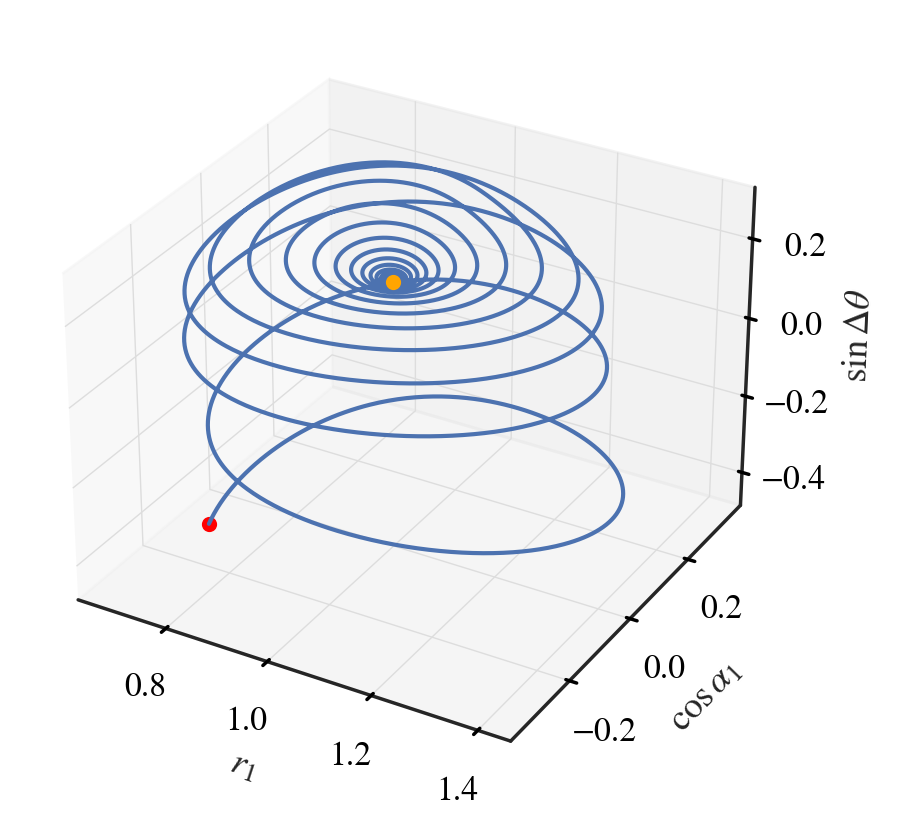

In [5]:
trajectories = trajectoriesPool[5]
r1, alpha1, DeltaTheta = trajectories
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(r1, np.cos(alpha1), np.sin(DeltaTheta))
# tailCounts = 100
# ax.plot(r1[-tailCounts:], np.cos(alpha1)[-tailCounts:], np.sin(DeltaTheta)[-tailCounts:])
ax.scatter(r1[0], np.cos(alpha1[0]), np.sin(DeltaTheta[0]), color="red")
ax.scatter(r1[-1], np.cos(alpha1[-1]), np.sin(DeltaTheta[-1]), color="orange")
ax.set_xlabel(r"$r_1$")
ax.set_ylabel(r"$\cos\alpha_1$")
ax.set_zlabel(r"$\sin\Delta\theta$")
plt.show()

In [39]:
initState = (
    TwoOsillatorsPolorization2(K=1, r0=4, omega2=3, omega1=2.9, dt=0.005)
    .get_fix_point()
)

tailCounts = 100
r0Pool = []
tailXLengthMaxPool = []
tailXLengthMinPool = []
r0Range = np.linspace(4, 0.5, 30)
for r0 in tqdm(r0Range):
    model = TwoOsillatorsPolorization2(K=1, r0=r0, omega2=3, omega1=2.9, dt=0.005)
    # initState = model.get_fix_point()
    if r0 == r0Range[0]:
        trajectories = model.get_trajectories(initState, 10000)
    else:
        initState = trajectories[:, -1]
        trajectories = model.get_trajectories(initState, 10000)
    r1, alpha1, DeltaTheta = trajectories
    firstR1LowerZero = np.where(r1 < 0)[0]
    if len(firstR1LowerZero) > 0:
        r1, alpha1, DeltaTheta = trajectories[:, :firstR1LowerZero[0]]
    tailXLength = np.sqrt(r1**2 + np.cos(alpha1)**2 + np.sin(DeltaTheta)**2)[-tailCounts:]
    tailXLengthMaxPool.append(tailXLength.max())
    tailXLengthMinPool.append(tailXLength.min())
    r0Pool.append(r0)

  0%|          | 0/30 [00:00<?, ?it/s]

Text(0.5, 0, '$\\sin\\Delta\\theta$')

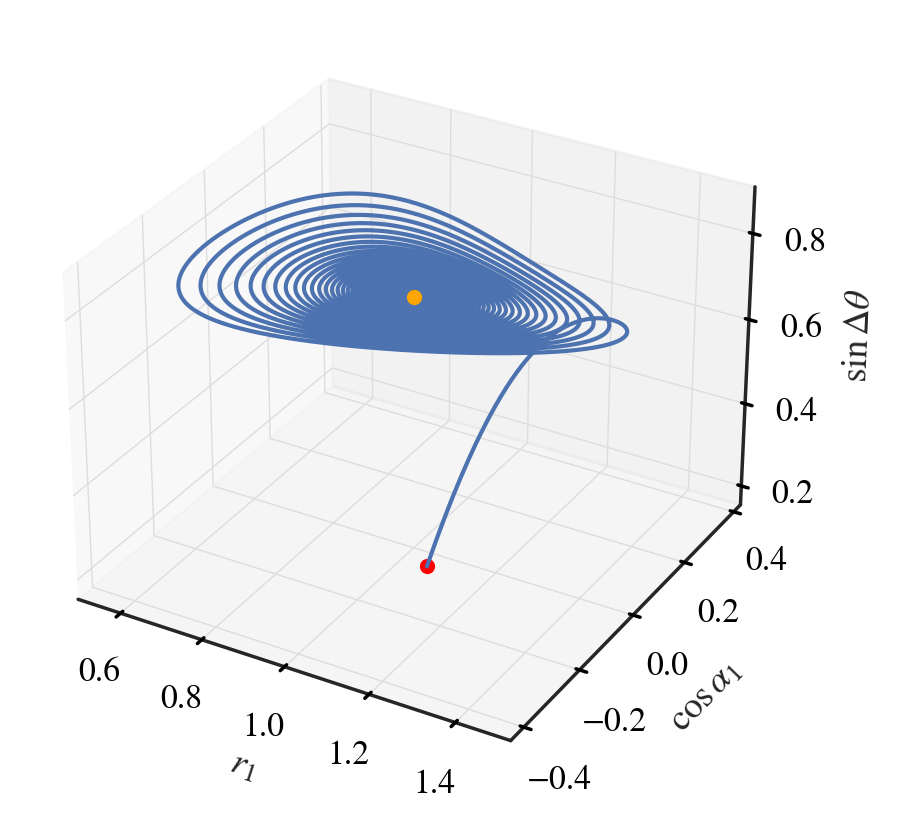

In [60]:
model = TwoOsillatorsPolorization2(K=10, r0=3.5, omega2=3, omega1=-2.9, dt=0.005)
initState = (
    TwoOsillatorsPolorization2(K=1, r0=4, omega2=3, omega1=2.9, dt=0.005)
    .get_fix_point() + 0.1
)
trajectories = model.get_trajectories(initState, 100000)
r1, alpha1, DeltaTheta = trajectories
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(r1, np.cos(alpha1), np.sin(DeltaTheta))
ax.scatter(r1[0], np.cos(alpha1[0]), np.sin(DeltaTheta[0]), color="red")
ax.scatter(r1[-1], np.cos(alpha1[-1]), np.sin(DeltaTheta[-1]), color="orange")
ax.set_xlabel(r"$r_1$")
ax.set_ylabel(r"$\cos\alpha_1$")
ax.set_zlabel(r"$\sin\Delta\theta$")

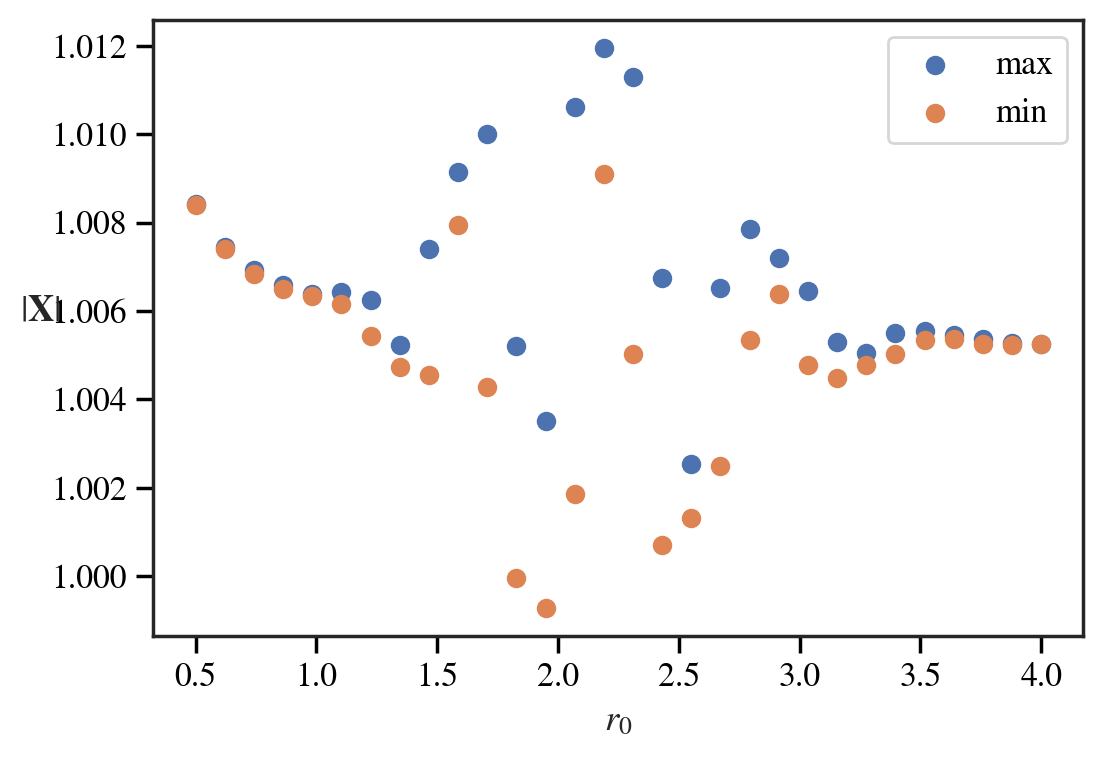

In [40]:
plt.figure(figsize=(6, 4))
plt.scatter(r0Pool, tailXLengthMaxPool, label="max")
plt.scatter(r0Pool, tailXLengthMinPool, label="min")
plt.xlabel(r"$r_0$")
plt.ylabel(r"$|\mathbf{X}|$", rotation=0)
plt.legend()

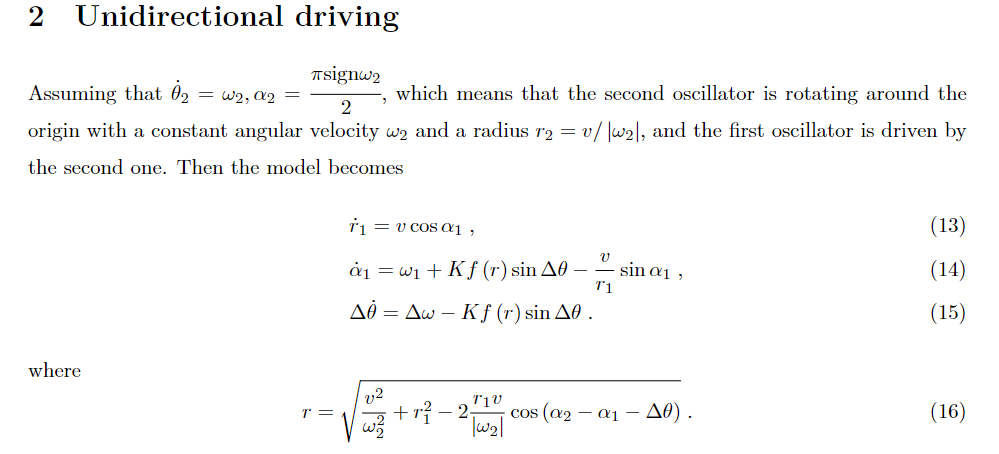

([], [])

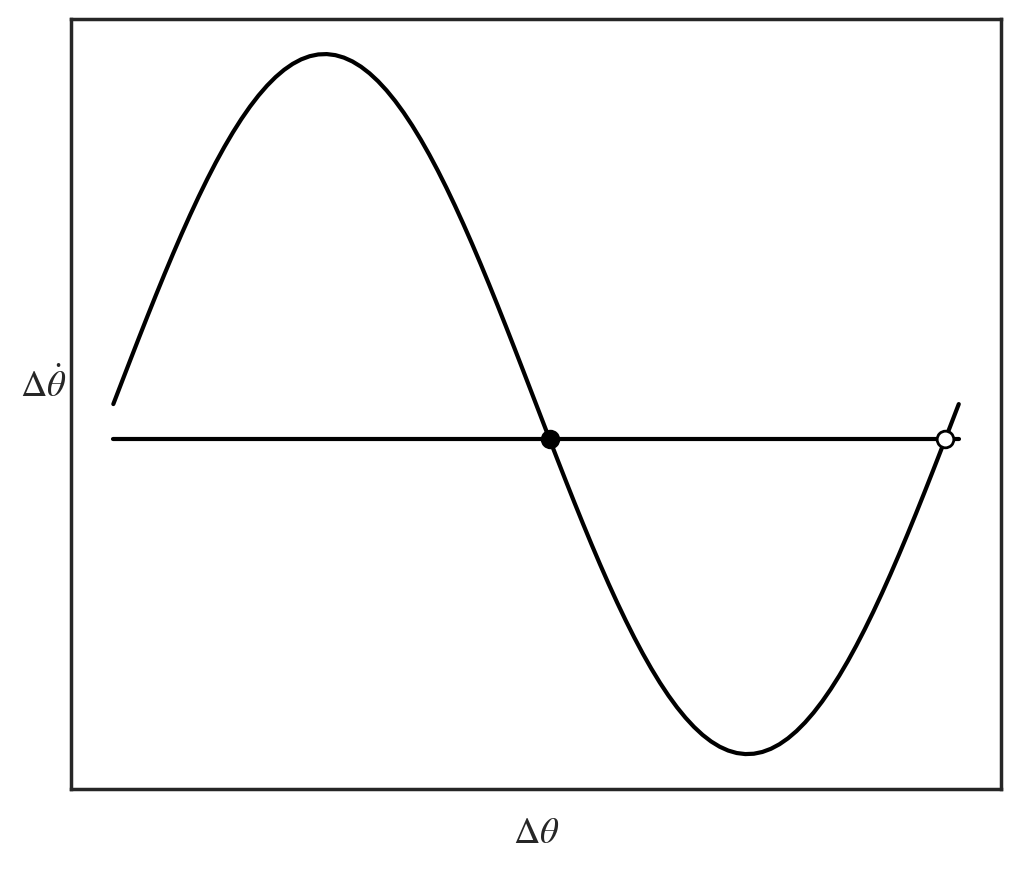

In [22]:
DeltaTheta = sp.symbols(r'\Delta\theta')
deltaOmega = 0.1
K = 1
sols = sp.solve(
    sp.Eq(0, deltaOmega - K * sp.sin(DeltaTheta)),
)
sols = [float(i) for i in sols]
plt.scatter(sols[0], [0], color='black')
plt.scatter(sols[1], [0], color='white', edgecolors="black", zorder=10)
plt.plot([-np.pi, np.pi], [0, 0], color='black', linestyle='-')
deltaThetaRange = np.linspace(-np.pi, np.pi, 100)
plt.plot(deltaThetaRange, deltaOmega - K * np.sin(deltaThetaRange), color='black')
plt.xlabel(r"$\Delta\theta$")
plt.ylabel(r"$\Delta\dot{\theta}$", rotation=0)
plt.xticks([])
plt.yticks([])
